# NBA Analytics

I have always loved the game of basketball and has been a fan of it ever since I was young. I wanted to explore more on this domain and look for interesting findings. Thus, I have decided to work on this project.

In this project, there are a few things that were looked into :

* #### Weight and Height Analysis
* #### Visualizing NBA Players Across Different Countries
* #### Average NBA Players Age

In [98]:
#### Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [38]:
#### Import dataset
df = pd.read_csv("all_seasons.csv", index_col = 0)

In [39]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [41]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [42]:
#### Check for missing values
df.isna().any()

player_name          False
team_abbreviation    False
age                  False
player_height        False
player_weight        False
college              False
country              False
draft_year           False
draft_round          False
draft_number         False
gp                   False
pts                  False
reb                  False
ast                  False
net_rating           False
oreb_pct             False
dreb_pct             False
usg_pct              False
ts_pct               False
ast_pct              False
season               False
dtype: bool

In [43]:
#### Round player_weight to 2 decimal points
df['player_weight'] = df['player_weight'].round(2)

In [44]:
#### Create additional variable
df['drafted'] = np.where(df['draft_year']=='Undrafted', '0', '1')

In [45]:
#### Replace values
df['draft_year'] = df['draft_year'].replace({'Undrafted': np.nan})

In [46]:
#### Change data types
df['age'] = df['age'].astype('int64')
df['draft_year'] = pd.to_datetime(df['draft_year'])
df['season'] = pd.to_datetime(df['season'].str[:4])

### Weight & Height Analysis

#### Top 10 Tallest NBA Players

In [47]:
#### Subset player_name & player_height to new df
nba_height = df[['player_name','player_height']]

In [48]:
#### Drop duplicates of the same player name
nba_height = nba_height.drop_duplicates('player_name')

In [49]:
#### Sort player_height by descending order
nba_height = nba_height.sort_values(by = 'player_height', ascending=True)

In [50]:
#### Retrieve only the top 10 tallest nba player
nba_height_10 = nba_height.iloc[-10:]

In [51]:
#### Set column to new variable names
height10_playerheight = nba_height_10['player_height']
height10_playername = nba_height_10['player_name']

#### Top 10 Heaviest NBA Players

In [52]:
#### Subset player_name & player_weight to new df
nba_weight = df[['player_name', 'player_weight']]

In [53]:
#### Drop duplicates of the same player name
nba_weight = nba_weight.drop_duplicates('player_name')

In [54]:
#### Sort player_height by descending order
nba_weight = nba_weight.sort_values(by = 'player_weight', ascending=True)

In [55]:
#### Retrieve only the top 10 tallest nba player
nba_weight_10 = nba_weight.iloc[-10:]

In [56]:
#### Set column to new variable names
weight10_playerweight = nba_weight_10['player_weight']
weight10_playername = nba_weight_10['player_name']

#### Subplot for 2 graphs

Text(0.0, 1.0, 'Top 10 Heaviest NBA Player')

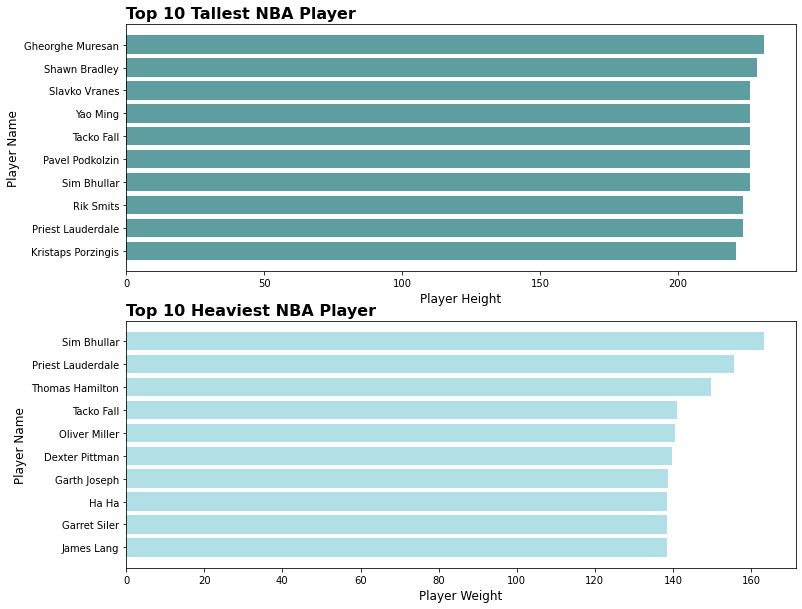

In [99]:
#### Create 2 subplots
fig, ax = plt.subplots(2, figsize=(12,10))

ax[0].barh(height10_playername, height10_playerheight, color  ='cadetblue')
ax[0].set_xlabel('Player Height', fontsize=12)
ax[0].set_ylabel('Player Name', fontsize=12)
ax[0].set_title('Top 10 Tallest NBA Player', fontweight= 'bold', loc = 'left', fontsize= 16)

ax[1].barh(weight10_playername, weight10_playerweight, color  ='powderblue')
ax[1].set_xlabel('Player Weight', fontsize=12)
ax[1].set_ylabel('Player Name', fontsize=12)
ax[1].set_title('Top 10 Heaviest NBA Player', fontweight= 'bold', loc = 'left', fontsize= 16)

#### Relationship between NBA Player's Weight and Height

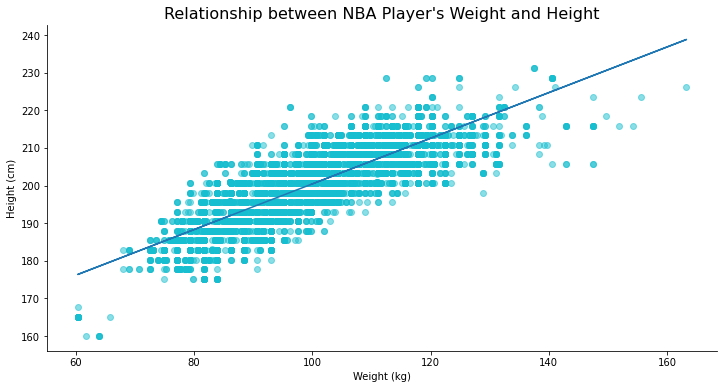

In [58]:
#### Initiate 2 new variables
weight = df['player_weight']
height = df['player_height']

plt.figure(figsize=(12,6))

m, b = np.polyfit(weight, height, 1)
plt.plot(weight, m*weight + b)
plt.scatter(weight,height, c='#17becf', alpha = 0.5)


plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Relationship between NBA Player's Weight and Height", fontsize=16)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

#### Correlation between Weight and Height

In [59]:
### Correlation between weight and height
nba_correlation = np.corrcoef(weight, height)
nba_correlation

array([[1.        , 0.82989671],
       [0.82989671, 1.        ]])

#### Weight and Height Over Time

In [60]:
#### Initiate new variable by grouping season, player height, player weight 
height_weight = df.groupby('season').agg({'player_height':'mean', 'player_weight':'mean'})

In [61]:
height_weight = height_weight.reset_index()

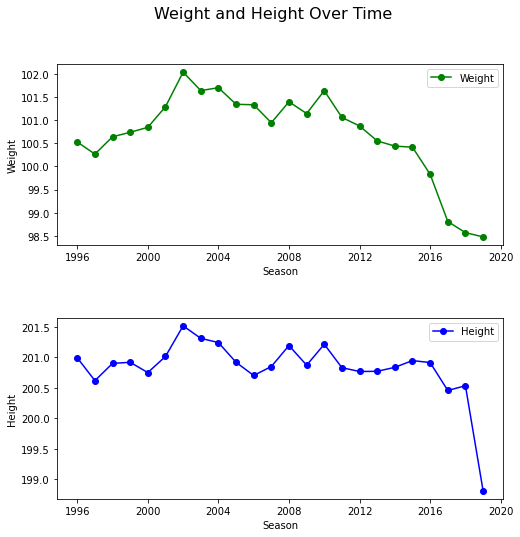

In [62]:
weight = height_weight['player_weight']
height = height_weight['player_height']
season = height_weight['season']


### Configure 2 subplots
fig, (ax1,ax2) = plt.subplots(2,figsize=(8,8))

### 
fig.suptitle('Weight and Height Over Time', fontsize=16)

ax1.plot(season, weight, marker='o', color='g', label = 'Weight')
ax1.set_xlabel("Season")
ax1.set_ylabel("Weight")
ax1.legend(loc="upper right")

ax2.plot(season, height, marker='o', color='b', label = 'Height')
ax2.set_xlabel("Season")
ax2.set_ylabel("Height")
ax2.legend(loc="upper right")


plt.subplots_adjust(hspace=0.4)





#### Does Height and Weight Impact Player Performance ?

In [63]:
#### Initiate new variable
correlation = df[['player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating']]

Text(0.5, 1.0, 'Correlation Matrix on Player Performance')

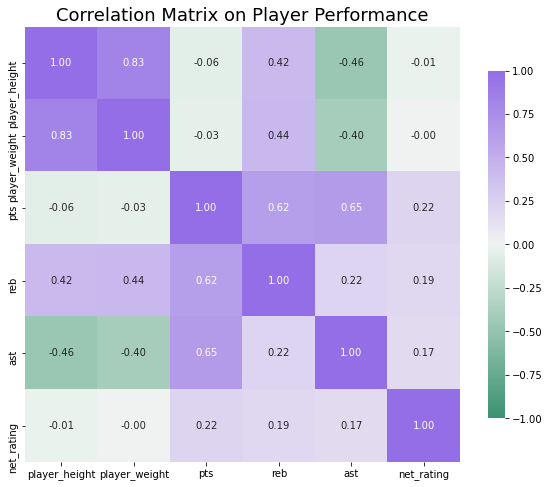

In [64]:
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation.corr(), annot=True, fmt=".2f",cmap=cmap ,vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)


plt.title("Correlation Matrix on Player Performance", fontsize=18)

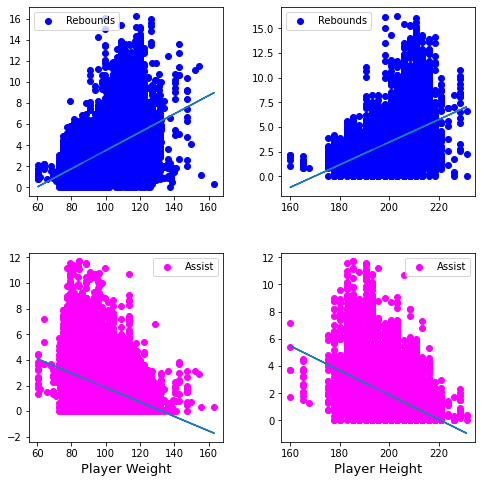

In [65]:
#### Creating 4 subplots
#### These subplots are created to visually show the correlation relationship between the variables
reb = correlation['reb']
ast = correlation['ast']
weight = correlation['player_weight']
height = correlation['player_height']

fig, ax = plt.subplots(2,2, figsize=(8,8))

p
m, b = np.polyfit(weight, reb, 1)
ax[0,0].plot(weight, m*weight + b)
ax[0,0].scatter(weight, reb, color='blue', label = 'Rebounds')
ax[0,0].legend(loc="upper left")

m, b = np.polyfit(weight, ast, 1)
ax[1,0].plot(weight, m*weight + b)
ax[1,0].scatter(weight, ast, color= 'magenta', label='Assist')
ax[1,0].legend(loc="upper right")
ax[1,0].set_xlabel("Player Weight", size=13)


m, b = np.polyfit(height, reb, 1)
ax[0,1].plot(height, m*height + b)
ax[0,1].scatter(height, reb, color='blue',label = 'Rebounds')
ax[0,1].legend(loc="upper left")


m, b = np.polyfit(height, ast, 1)
ax[1,1].plot(height, m*height + b)
ax[1,1].scatter(height, ast, color='magenta', label='Assist')
ax[1,1].legend(loc="upper right")
ax[1,1].set_xlabel("Player Height", size=13)


plt.subplots_adjust(wspace=0.3, hspace=0.3)

### Visualizing NBA Players Across Different Countries

##### Import new country_code data file

In [67]:
country_codes = pd.read_csv("country_code.csv", index_col = 0)

In [68]:
country_codes = country_codes.rename({'Country_name': 'country'},axis = 1)

In [69]:
country_codes = country_codes[['country', 'code_3digit']]

#### Fix Country Names

In [70]:
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })

In [71]:
df['country'] = df['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})

#### Subset data for GeoMap Visuals 

In [72]:
geodata = df[['player_height', 'player_weight', 'country', 'player_name']]

In [73]:
player_country = geodata.groupby("country").agg({'player_name':'count', 'player_height':'mean', 'player_weight':'mean'})

In [74]:
player_country = pd.merge(player_country, country_codes, how = 'inner', on = 'country')

In [75]:
player_country = player_country.reset_index()

In [76]:
player_country

,index,country,player_name,player_height,player_weight,code_3digit
0,0,Angola,1,205.740000,108.860000,AGO
1,1,Argentina,60,200.490667,100.539833,ARG
2,2,Australia,74,200.213784,101.186216,AUS
3,3,Austria,4,213.995000,106.030000,AUT
4,4,Bahamas,6,199.813333,102.966667,BHS
...,...,...,...,...,...,...
61,61,USA,9410,199.875201,99.678835,USA
62,62,Ukraine,39,210.624615,118.446154,UKR
63,63,United Kingdom,33,204.354545,104.559697,GBR
64,64,Uruguay,2,208.280000,122.015000,URY


In [103]:
fig = go.Figure(data=go.Choropleth(
    locations = player_country['code_3digit'],
    z = player_country['player_name'],
    text = player_country['country'],
    colorscale = 'burg',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Count',
))

fig.update_layout(
    title_text='NBA Players Across The World',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [102]:
fig = go.Figure(data=go.Choropleth(
    locations = player_country['code_3digit'],
    z = player_country['player_height'],
    text = player_country['country'],
    colorscale = 'sunset',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Average Height',
))

fig.update_layout(
    title_text='Average NBA Player Height Across Different Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [101]:
fig = go.Figure(data=go.Choropleth(
    locations = player_country['code_3digit'],
    z = player_country['player_weight'],
    text = player_country['country'],
    colorscale = 'sunset',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Average Weight',
))

fig.update_layout(
    title_text='Average NBA Player Weight Across Different Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### Exploratory on All Time Scoring / Rebounds / Assist Players

##### Sum of Average Points Scored 

In [80]:
df_scores = df.groupby(['player_name']).agg({'pts' : 'sum', 'reb': 'sum', 'ast' : 'sum'})

In [81]:
df_scores = df_scores.reset_index()

In [82]:
df_pts = df_scores[['player_name', 'pts']]

In [83]:
df_pts = df_pts.sort_values('pts', ascending=True)

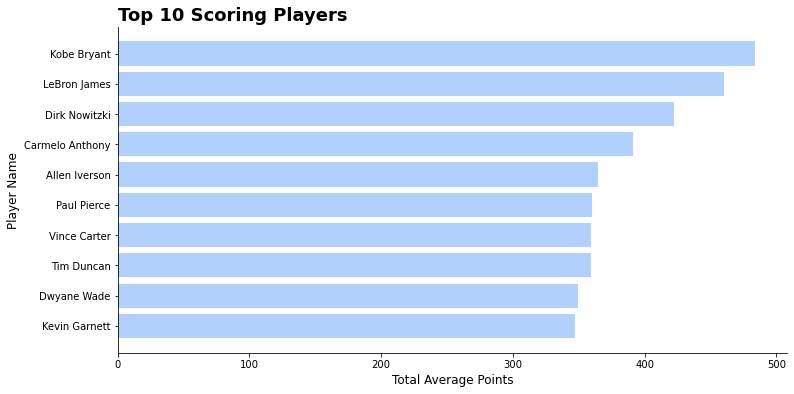

In [84]:
top_10_pts = df_pts.iloc[-10:]
plyr_name = top_10_pts['player_name']
points = top_10_pts['pts']

plt.figure(figsize=(12,6))

plt.barh(plyr_name, points, color= '#b1d1fc')
plt.xlabel('Total Average Points', fontsize = 12)
plt.ylabel('Player Name', fontsize = 12)



plt.title('Top 10 Scoring Players', fontsize = 18, fontweight='bold', loc='left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



##### Sum of Average Assist

In [85]:
df_ast = df_scores[['player_name', 'ast']]

In [86]:
df_ast = df_ast.sort_values('ast', ascending=True)

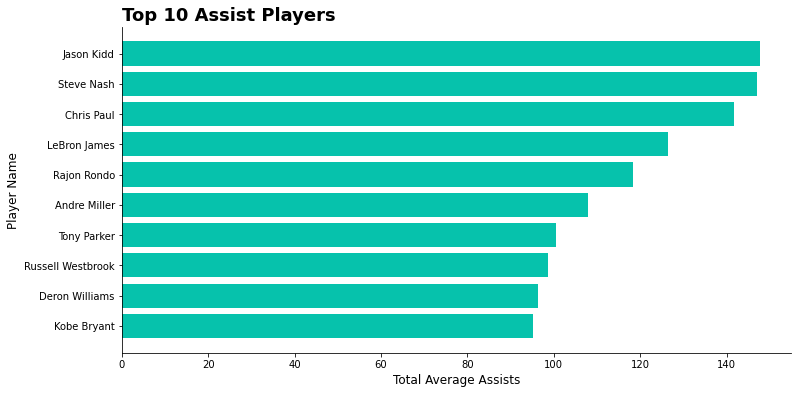

In [87]:
top_10_ast = df_ast.iloc[-10:]
plyr_name = top_10_ast['player_name']
assist = top_10_ast['ast']

plt.figure(figsize=(12,6))

plt.barh(plyr_name, assist, color = '#06c2ac')
plt.xlabel('Total Average Assists', fontsize = 12)
plt.ylabel('Player Name', fontsize = 12)



plt.title('Top 10 Assist Players',fontsize = 18, fontweight='bold', loc='left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()




##### Sum of Average Rebounds

In [88]:
df_reb = df_scores[['player_name', 'reb']]

In [89]:
df_reb = df_reb.sort_values('reb', ascending=True)

In [90]:
df_reb

,player_name,reb
1879,Scotty Hopson,0.0
366,Chris Smith,0.0
1295,Kyle Guy,0.0
49,Alex Scales,0.0
23,Adonis Jordan,0.0
...,...,...
1680,Pau Gasol,162.8
2132,Tyson Chandler,165.7
649,Dwight Howard,193.4
1249,Kevin Garnett,196.6


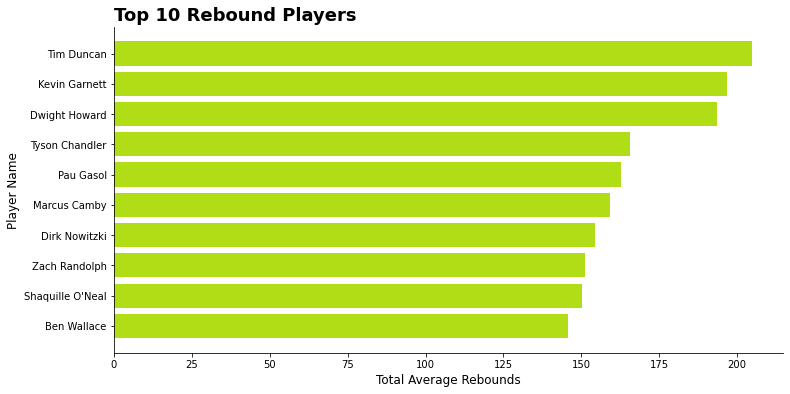

In [91]:
top_10_reb = df_reb.iloc[-10:]
plyr_name = top_10_reb['player_name']
rebound = top_10_reb['reb']

plt.figure(figsize=(12,6))

plt.barh(plyr_name, rebound, color = '#b0dd16')
plt.xlabel('Total Average Rebounds', fontsize = 12)
plt.ylabel('Player Name', fontsize = 12)



plt.title('Top 10 Rebound Players',fontsize = 18, fontweight='bold', loc='left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()




### Average NBA Players Age 

In [92]:
#### Getting the average age for each season
df_age = df.groupby(['season']).agg({'age' : 'mean'})


In [93]:
df_age = df_age.reset_index()

In [95]:
#### Converting the age to 0 decimal points and as integer type
df_age['age'] = df_age['age'].round()


In [96]:
df_age['age'] = df_age['age'].astype('int')

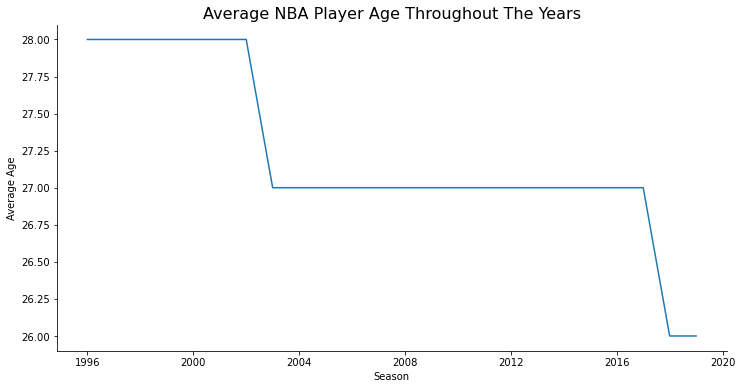

In [104]:
ax = plt.figure(figsize = (12,6))

ax = plt.plot(df_age['season'], df_age['age'])

plt.xlabel("Season")
plt.ylabel("Average Age")
plt.title("Average NBA Player Age Throughout The Years", fontsize=16)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

#### That's all. Thanks for looking into my project ! :)